# Import Library

In [8]:
import pandas as pd
import numpy as np
import os
import string
import re
import emoji
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud

cwd = os.getcwd()
train_dirty_set = pd.read_csv(cwd + "/dataset_train_dirty.csv")
test_set = pd.read_csv(cwd + "/dataset_test.csv")

# Review Data

In [9]:
train_dirty_set.head()

,search_text,label
0,\nÁo khoác adidas nu 💯,1
1,\nMỗi thùng bia đều có thẻ cào hả chị,0
2,\n🌸 Hàng mới về 👗\nVáy đũi nhún eo.\n3 màu y h...,1
3,\nPolo Adidas Performance Bayer - 100% cotton ...,1
4,\nAdidas Uk 540k + cân\nXanh: size 18-24m\nHồn...,1


# Check Null Data, Drop NaN rows

In [10]:
train_dirty_set = train_dirty_set.dropna()
train_dirty_set = train_dirty_set.drop_duplicates(subset="search_text")

# Make a Copy Data

In [11]:
test = train_dirty_set['search_text']

# Clean data

In [12]:
def clean_text_wo_num(x):
    htmltag = re.compile('<(?:[A-Za-z_:][\w:.-]*(?=\s)(?!(?:[^>\"\']|\"[^\"]*\"|\'[^\']*\')*?(?<=\s)(?:term|range)\s*=)(?!\s*/?>)\s+(?:\".*?\"|\'.*?\'|[^>]*?)+|/?[A-Za-z_:][\w:.-]*\s*/?)>')
    x = re.sub(htmltag, ' ', x)
    x = re.sub(r'^\W', ' ', x)
    x = re.sub(r'&lt;(.+?)&gt;|&amp;nbsp;', '', x)
    x = " ".join(str(x).lower() for x in str(x).split())
    table = str.maketrans('', '', string.punctuation)
    x = " ".join (str(x).translate(table) for x in str(x).split())
    x = emoji.get_emoji_regexp().sub(u' ',x)
    x = " ".join(x for x in str(x).split() if len(x) < 10)
    x = x.strip()
    return x
test_w_num = test.apply(lambda x: clean_text_wo_num(x))
test_set_w_num = test_set['search_text'].apply(lambda x: clean_text_wo_num(x))
f = open("train_sw.txt", "w")
for i in test_set_w_num:
    f.write(i+'\n')
f.close()
f = open("test_sw.txt", "w")
for i in test_w_num:
    f.write(i+'\n')
f.close()

In [13]:
def clean_text(x):
    htmltag = re.compile('<(?:[A-Za-z_:][\w:.-]*(?=\s)(?!(?:[^>\"\']|\"[^\"]*\"|\'[^\']*\')*?(?<=\s)(?:term|range)\s*=)(?!\s*/?>)\s+(?:\".*?\"|\'.*?\'|[^>]*?)+|/?[A-Za-z_:][\w:.-]*\s*/?)>')
    x = re.sub(htmltag, ' ', x)
    x = re.sub(r'^\W', ' ', x)
    x = re.sub(r'&lt;(.+?)&gt;|&amp;nbsp;', '', x)
    x = " ".join(str(x).lower() for x in str(x).split())
    table = str.maketrans('', '', string.punctuation)
    x = " ".join (str(x).translate(table) for x in str(x).split())
    x = emoji.get_emoji_regexp().sub(u' ',x)
    x = " ".join(x for x in str(x).split() if len(x) < 10)
#     x = re.sub(r'\b[0-9]+[a-z]*', 'AMOUNT', x)
#     x = re.sub(r'(AMOUNT)+', 'AMOUNT', x)
    x = x.strip()
    return x
test = test.apply(lambda x: clean_text(x))
test_set["search_text"] = test_set['search_text'].apply(lambda x: clean_text(x))

# Create new DataFrame store cleaned data

In [14]:
train_clean_set = pd.DataFrame([test, train_dirty_set['label']]).transpose()
train_clean_set['label'] = train_clean_set['label'].astype(int)

# Review clean set

In [15]:
train_clean_set.head()

,search_text,label
0,áo khoác adidas nu,1
1,mỗi thùng bia đều có thẻ cào hả chị,0
2,hàng mới về váy đũi nhún eo 3 màu y hình 270k,1
3,polo adidas bayer 100 cotton ạ size s âu dành ...,1
4,adidas uk 540k cân xanh size 1824m hồng size 3m3y,1


# Get number of word and length of string

In [16]:
def avg_word(sentence):
    words = sentence.split()
    return sum(len(word) for word in words)/len(words) if len(words) else 0

In [17]:
train_clean_set['word_count'] = train_clean_set['search_text'].apply(lambda x: len(x.split()))
train_clean_set['length'] = train_clean_set['search_text'].apply(lambda x: len(x))
train_clean_set['avg_word'] = train_clean_set['search_text'].apply(lambda x: avg_word(x))

# Describe data

In [18]:
print(train_clean_set.describe())
print(train_clean_set.head())
print(train_clean_set.info())

              label    word_count        length      avg_word
count  40000.000000  40000.000000  40000.000000  40000.000000
mean       0.501225    117.110200    519.042800      3.431374
std        0.500005    281.615687   1257.105827      0.392057
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000     33.000000    148.000000      3.204504
50%        1.000000     62.000000    271.000000      3.400000
75%        1.000000    104.000000    454.000000      3.596491
max        1.000000  18933.000000  86089.000000      9.000000
                                         search_text  label  word_count  \
0                                 áo khoác adidas nu      1           4   
1                mỗi thùng bia đều có thẻ cào hả chị      0           9   
2      hàng mới về váy đũi nhún eo 3 màu y hình 270k      1          12   
3  polo adidas bayer 100 cotton ạ size s âu dành ...      1          17   
4  adidas uk 540k cân xanh size 1824m hồng size 3m3y      1        

In [19]:
train_clean_set.to_csv('train_clean_set.csv', index=False)
test_set.to_csv('test_clean_set.csv', index=False)

Text(0.5, 1.0, 'Number of spam and non-spam')

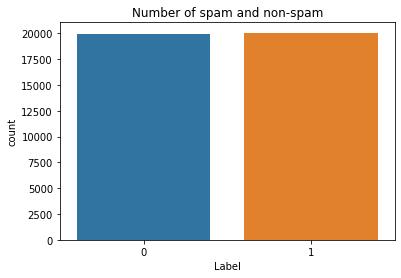

In [20]:
sns.countplot(train_clean_set.label)
plt.xlabel("Label")
plt.title("Number of spam and non-spam")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe69786f278>,
      dtype=object)

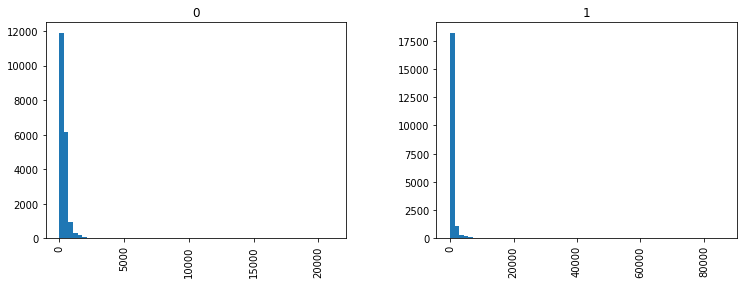

In [21]:
train_clean_set.hist(column='length', by='label', bins=60, figsize=(12,4))

In [22]:
def show_wordcloud(data, title):
    text = ' '.join(data['search_text'].astype(str).tolist())
    fig_wordcloud = wordcloud.WordCloud(background_color='lightgrey', colormap='viridis',width=800,height=600).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title,fontsize=20)
    plt.show()

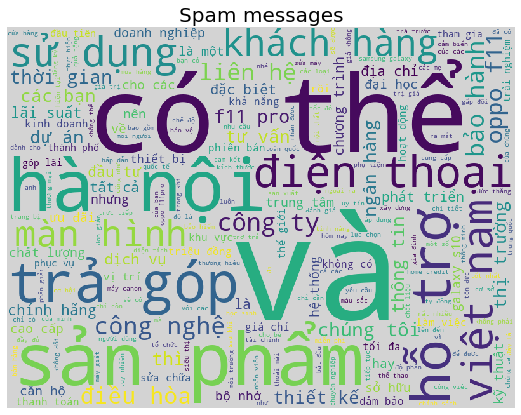

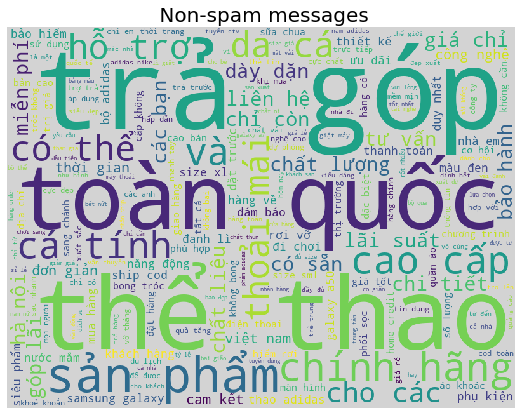

In [23]:
spam = train_clean_set[train_clean_set['label'] == 1].copy()
nonspam = train_clean_set[train_clean_set['label'] == 0].copy()
show_wordcloud(spam, 'Spam messages')
show_wordcloud(nonspam,' Non-spam messages')